# Self Create Data Set

In [1]:
import numpy as np
import itertools
in_perm = []
in_perm.extend(list(itertools.permutations([0.0, 0.0, 0.0])))
in_perm.extend(list(itertools.permutations([1.0, 0.0, 0.0])))
in_perm.extend(list(itertools.permutations([1.0, 1.0, 0.0])))
in_perm.extend(list(itertools.permutations([1.0, 1.0, 1.0])))
input_vects = np.array(in_perm).reshape(24,3)
print(len(input_vects))
obj_func = lambda x: np.array((np.sum(x)%2, (np.sum(x)+1)%2))
target_vects = np.apply_along_axis(obj_func, 1, input_vects)
print('input:\n', input_vects)
print('target:\n', target_vects)

24
input:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]
 [0. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
target:
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [2]:
import net
nn = net.NeuralNet(3, 2, [5, 5])
nn.dump()
out = nn.predict(input_vects)
print(out)
print(nn.loss(out, target_vects))

------
weight:
 [[ 0.00731007  0.05101852  0.1547849   0.05115226  0.12268522]
 [ 0.02325519  0.0210894  -0.09895071 -0.2302177  -0.01330932]
 [ 0.14186956  0.05800872  0.24086507 -0.08728282 -0.12119817]]
bias:
 [[ 0.00731007  0.05101852  0.1547849   0.05115226  0.12268522]
 [ 0.02325519  0.0210894  -0.09895071 -0.2302177  -0.01330932]
 [ 0.14186956  0.05800872  0.24086507 -0.08728282 -0.12119817]]
------
weight:
 [[-0.02331072 -0.07949589  0.09544081 -0.158361    0.06124505]
 [-0.00664799 -0.18097211 -0.05488319 -0.03812984 -0.02588613]
 [ 0.01700033 -0.16250006  0.15070375  0.05765163  0.02194747]
 [ 0.00140205 -0.03529639  0.0776557  -0.18908656  0.12376287]
 [ 0.1913583   0.05514358 -0.09983006 -0.20788377 -0.03503711]]
bias:
 [[-0.02331072 -0.07949589  0.09544081 -0.158361    0.06124505]
 [-0.00664799 -0.18097211 -0.05488319 -0.03812984 -0.02588613]
 [ 0.01700033 -0.16250006  0.15070375  0.05765163  0.02194747]
 [ 0.00140205 -0.03529639  0.0776557  -0.18908656  0.12376287]
 [ 0.1

In [3]:
for i in range(1000):
    nn.update(input_vects, target_vects, 1)
    #print(nn.loss(nn.predict(input_vects), target_vects))
predict_vects = nn.predict_encode(nn.predict(input_vects))
print(predict_vects)
print(nn.accuracy(predict_vects, target_vects))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
0.75


# Digital Number Data Set

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load digital data

(1797, 64)


<Figure size 432x288 with 0 Axes>

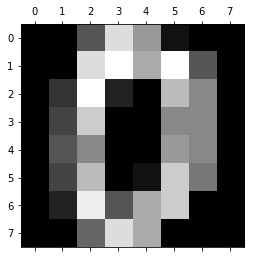

In [5]:
digits = load_digits()
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [6]:
data_df = pd.DataFrame(digits['data'])
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
label_df = pd.DataFrame(digits['target'])
label_df.head()

,0
0,0
1,1
2,2
3,3
4,4


## Feature max-min normailize

In [8]:
#from scipy.stats import zscore
def normalize(x):
    m = x.max()
    if m != 0:
        return x/m
    else:
        return x
data_df = data_df.apply(normalize, axis=0)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,...,0.3125,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,...,0.5625,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0


## Target label one-hot encodeing

In [9]:
label_df = pd.get_dummies(label_df[0])
label_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


## Data set split

In [10]:
data_train, data_test, target_train, target_test = train_test_split(np.array(data_df), np.array(label_df), test_size = 0.2)

## Build and train network

100%|██████████| 5000/5000 [00:17<00:00, 289.05it/s]


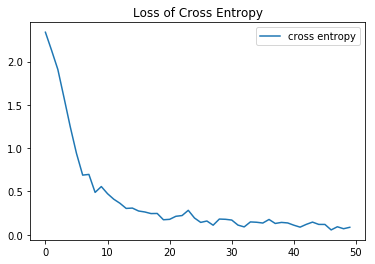

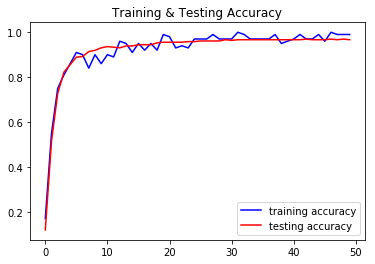

===== Final Result =====
loss: 0.14971143757018474
train_acc: 0.96
test_acc: 0.9666666666666667


In [11]:
from tqdm import tqdm
import net

nn = net.NeuralNet(64, 10, [64])

iteration = 5000
learning_rate = 0.1
batch_size = 100

cross_entropy_line = []
train_acc_line = []
test_acc_line = []

for i in tqdm(range(iteration)):
    #print('--- iteration: {} ---'.format(i))
    sample_idx = np.random.choice(len(data_train), batch_size)
    train_batch = data_train[sample_idx]
    target_batch = target_train[sample_idx]
    nn.update(train_batch, target_batch, learning_rate)
    if i % 100 == 0:
        train_predicts = nn.predict(train_batch)
        ce = nn.loss(train_predicts, target_batch)
        cross_entropy_line.append(ce)

        train_acc = nn.accuracy(nn.predict_encode(train_predicts), target_batch)
        train_acc_line.append(train_acc)

        test_predicts = nn.predict(data_test)
        test_acc = nn.accuracy(nn.predict_encode(test_predicts), target_test)
        test_acc_line.append(test_acc)
        
plt.title('Loss of Cross Entropy')
plt.plot(cross_entropy_line, label = 'cross entropy')
plt.legend()
plt.show()
plt.title('Training & Testing Accuracy')
plt.plot(train_acc_line, 'b', label = 'training accuracy')
plt.plot(test_acc_line, 'r', label = 'testing accuracy')
plt.legend()
plt.show()

print('===== Final Result =====')
train_predicts = nn.predict(train_batch)
ce = nn.loss(train_predicts, target_batch)
cross_entropy_line.append(ce)
print('loss:', ce)
train_acc = nn.accuracy(nn.predict_encode(train_predicts), target_batch)
train_acc_line.append(train_acc)
print('train_acc:', train_acc)
test_predicts = nn.predict(data_test)
test_acc = nn.accuracy(nn.predict_encode(test_predicts), target_test)
test_acc_line.append(test_acc)
print('test_acc:', test_acc)


## Try different network structure

100%|██████████| 10000/10000 [00:47<00:00, 210.25it/s]


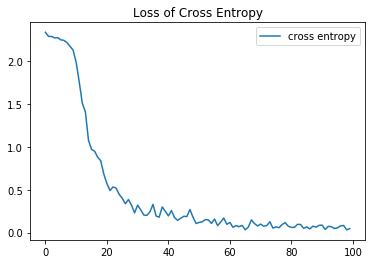

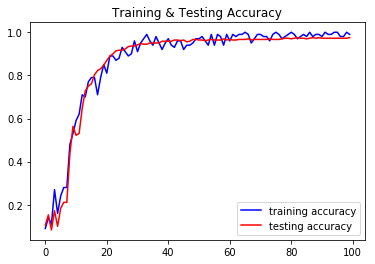

===== Final Result =====
loss: 0.05885961309942258
train_acc: 0.98
test_acc: 0.9777777777777777


In [12]:
from tqdm import tqdm
import net

nn = net.NeuralNet(64, 10, [64, 32])

iteration = 10000
learning_rate = 0.1
batch_size = 100

cross_entropy_line = []
train_acc_line = []
test_acc_line = []

for i in tqdm(range(iteration)):
    #print('--- iteration: {} ---'.format(i))
    sample_idx = np.random.choice(len(data_train), batch_size)
    train_batch = data_train[sample_idx]
    target_batch = target_train[sample_idx]
    nn.update(train_batch, target_batch, learning_rate)
    if i % 100 == 0:
        train_predicts = nn.predict(train_batch)
        ce = nn.loss(train_predicts, target_batch)
        cross_entropy_line.append(ce)

        train_acc = nn.accuracy(nn.predict_encode(train_predicts), target_batch)
        train_acc_line.append(train_acc)

        test_predicts = nn.predict(data_test)
        test_acc = nn.accuracy(nn.predict_encode(test_predicts), target_test)
        test_acc_line.append(test_acc)
        
plt.title('Loss of Cross Entropy')
plt.plot(cross_entropy_line, label = 'cross entropy')
plt.legend()
plt.show()
plt.title('Training & Testing Accuracy')
plt.plot(train_acc_line, 'b', label = 'training accuracy')
plt.plot(test_acc_line, 'r', label = 'testing accuracy')
plt.legend()
plt.show()

print('===== Final Result =====')
train_predicts = nn.predict(train_batch)
ce = nn.loss(train_predicts, target_batch)
cross_entropy_line.append(ce)
print('loss:', ce)
train_acc = nn.accuracy(nn.predict_encode(train_predicts), target_batch)
train_acc_line.append(train_acc)
print('train_acc:', train_acc)
test_predicts = nn.predict(data_test)
test_acc = nn.accuracy(nn.predict_encode(test_predicts), target_test)
test_acc_line.append(test_acc)
print('test_acc:', test_acc)
